<a href="https://colab.research.google.com/github/farhanraza200001/Linear-Regression/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

### <u> Tasks </u>
* ### Validate all the assumptions
* ### Compute all the regression evaluation metrics
* ### Comment on the best evaluation metrics for this problem

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

# **Loading Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/ML Assignments data/Copy of 50_Startups.csv')

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [8]:
#from above info we see that every column have numerical values except state, state have catogorical values

In [9]:
#Create a dummy variable for the ccatogorical varaible 'state'

In [10]:
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [11]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


# Exploratory Data Analysis

In [12]:
#Create Boxplot

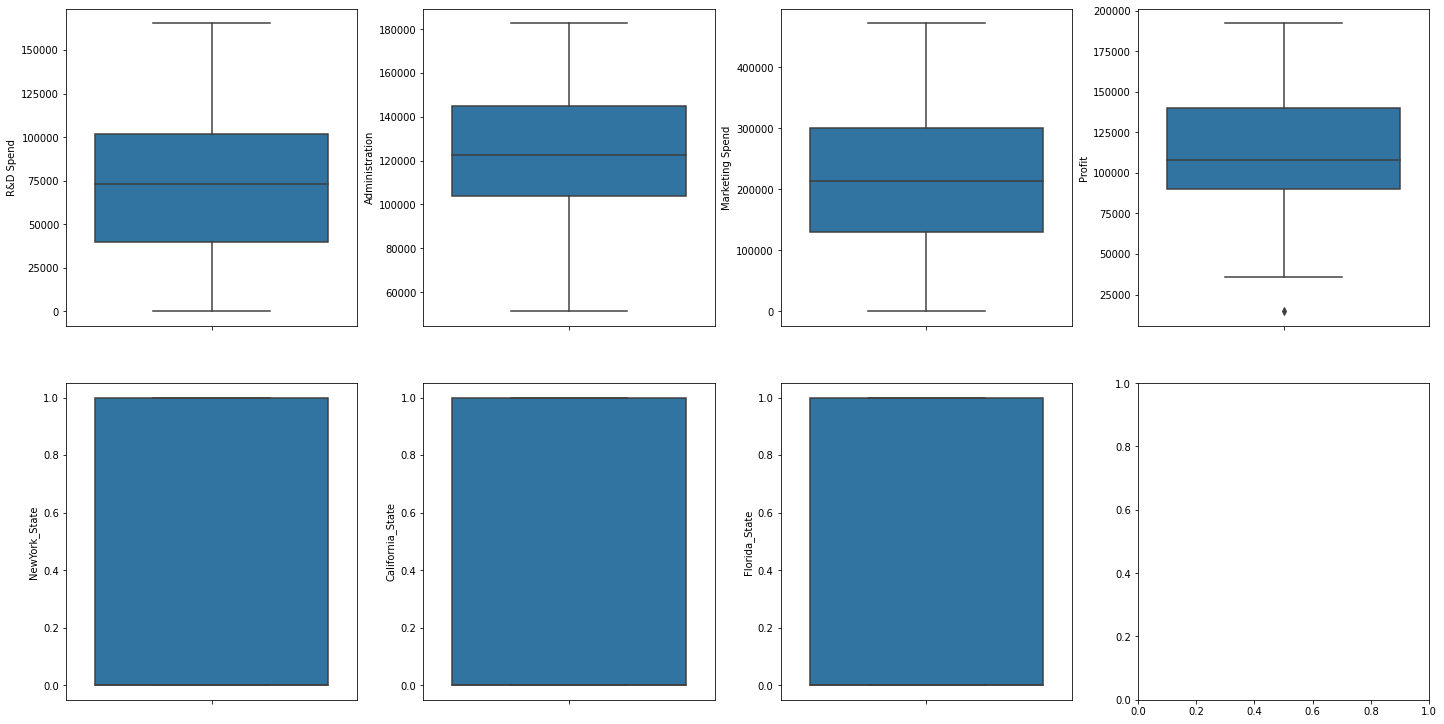

In [13]:
fig,ax = plt.subplots(ncols=4,nrows=2,figsize=(20,10))
index=0
ax = ax.flatten()
for col, value in dataset.items():
  sns.boxplot(y=col, data=dataset, ax=ax[index])
  index+=1
  plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [14]:
#from the above Boxplot we see that thier is no outliers

In [15]:
#now creating distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

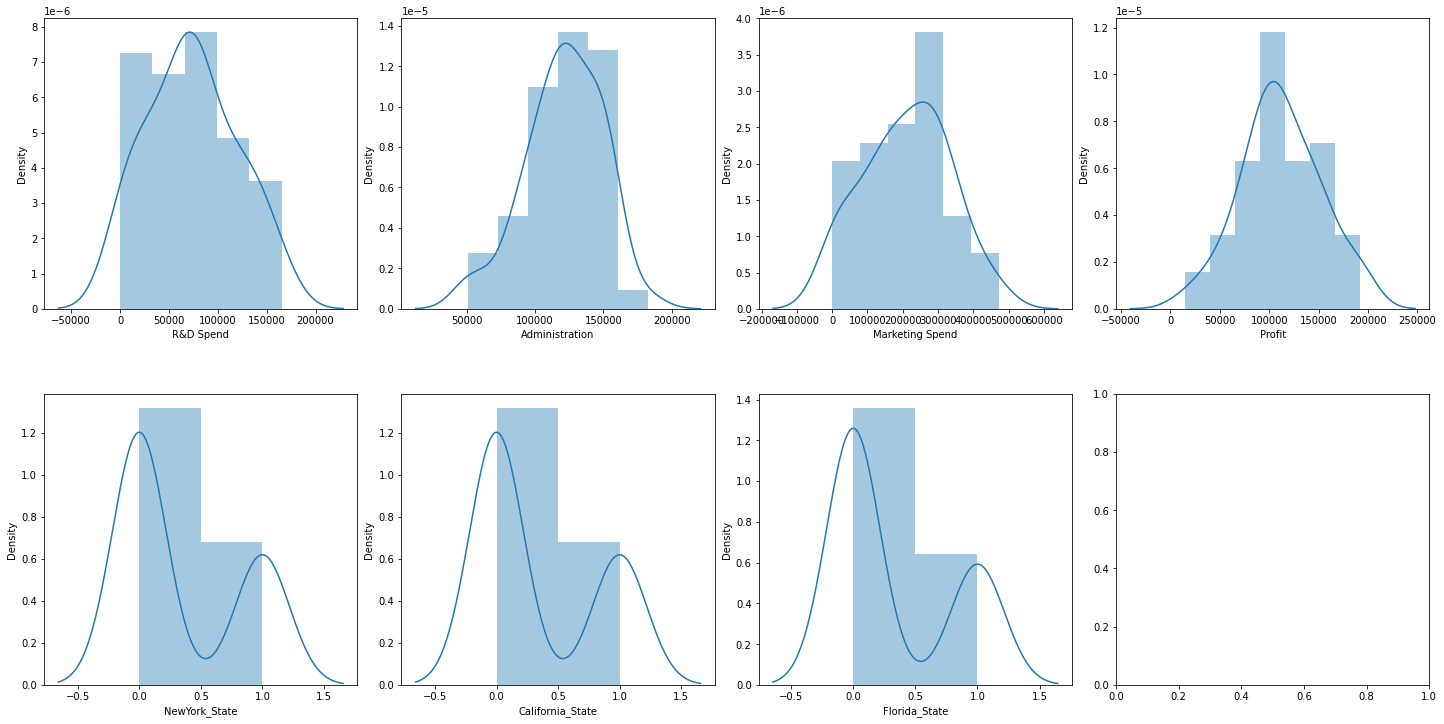

In [16]:
fig,ax = plt.subplots(ncols=4,nrows=2,figsize=(20,10))
index=0
ax = ax.flatten()
for col, value in dataset.items():
  sns.distplot(value, ax=ax[index])
  index+=1
  plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [17]:
#from the above distplot graph we observe that the range of some coloumns are very high,so we have to go for min-max normalisation

## **Min-Max Normalisation**

In [18]:
cols = ['R&D Spend' , 'Administration' , 'Marketing Spend' , 'Profit']
for col in cols:
  #find minimum and maximum of that coloumn
  minimum = min(dataset[col]) 
  maximum = max(dataset[col])
  dataset[col] = (dataset[col]-minimum)/(maximum-minimum)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

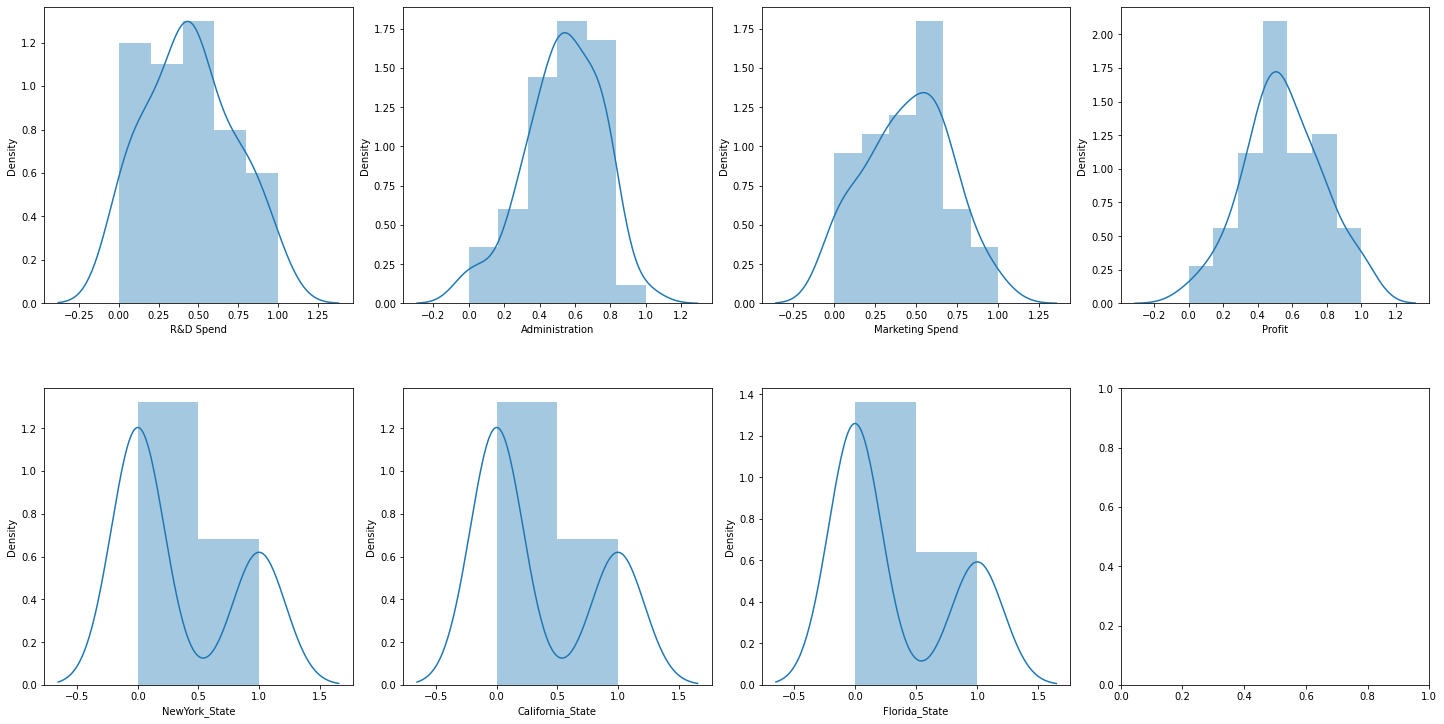

In [19]:
fig,ax = plt.subplots(ncols=4,nrows=2,figsize=(20,10))
index=0
ax = ax.flatten()
for col, value in dataset.items():
  sns.distplot(value, ax=ax[index])
  index+=1
  plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [20]:
#from above graph we observe that ranges are aprx same for all columns in between 0-1

## **Steps for Linear Regression**

In [21]:
#Extract independent and dependent variable from data as x nd y

In [22]:
dependent_variable = 'Profit'

In [23]:
#list of independent variables

In [24]:
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [25]:
independent_variables

['Florida_State',
 'NewYork_State',
 'Marketing Spend',
 'California_State',
 'Administration',
 'R&D Spend']

In [26]:
# Create the data of independent variables
X = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [27]:
#splitting dataset into training and testing sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [29]:
X_train[0:5]

array([[1.        , 0.        , 0.62976785, 0.        , 0.49125975,
        0.00795565],
       [0.        , 0.        , 0.31370517, 1.        , 0.34185188,
        0.14297577],
       [0.        , 0.        , 0.63305328, 1.        , 0.47642362,
        0.46116861],
       [0.        , 1.        , 0.43561799, 0.        , 0.25703165,
        0.2782839 ],
       [1.        , 0.        , 0.19316302, 0.        , 0.48992809,
        0.37493063]])

In [30]:
X_test[0:5]

array([[0.        , 0.        , 0.94089337, 1.        , 0.76197173,
        0.98335946],
       [0.        , 1.        , 0.63532724, 0.        , 0.78021012,
        0.47408436],
       [0.        , 1.        , 0.22709197, 0.        , 0.77456642,
        0.39676926],
       [0.        , 0.        , 0.64644319, 1.        , 0.43692884,
        0.74590551],
       [0.        , 1.        , 0.07531871, 0.        , 0.57930693,
        0.09377566]])

In [31]:
y_train[0:5]

array([0.19602019, 0.3199513 , 0.58448237, 0.4606257 , 0.48009902])

In [32]:
y_test[0:5]

array([0.99735461, 0.54415692, 0.48610784, 0.7606613 , 0.31015569])

In [33]:
#now implementation of linear regression model on our train set

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
lr.intercept_

7539231725936.534

In [54]:
lr.coef_

array([-7.53923173e+12, -7.53923173e+12,  8.69140625e-02, -7.53923173e+12,
       -3.54003906e-03,  7.52929688e-01])

In [36]:
# Predicting the Test set results

In [37]:
lr.predict(X_test)

array([1.        , 0.58105469, 0.48632812, 0.79785156, 0.24609375,
       1.00878906, 0.68457031, 0.76953125, 0.4765625 , 0.49804688])

In [38]:
#store this in a new const y_pred
y_pred = lr.predict(X_test)

In [39]:
y_test[0:5]

array([0.99735461, 0.54415692, 0.48610784, 0.7606613 , 0.31015569])

In [40]:
y_pred[0:5]

array([1.        , 0.58105469, 0.48632812, 0.79785156, 0.24609375])

In [41]:
math.sqrt(mean_squared_error(y_test, y_pred))

0.04611424628341341

In [42]:
r2_score(y_test, y_pred)

0.9551244652574087

here 0.95 means,the accuracy of regressor is 95% for the testing dataset

# Validating Assumptions

In [43]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


In [44]:
#Residual = Actual value - Predicted value

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

## **Let's check if the mean of residuals is almost zero:**

In [45]:
round((np.mean(residuals_train)))

0

## **Lets check for homoscedasticity:**

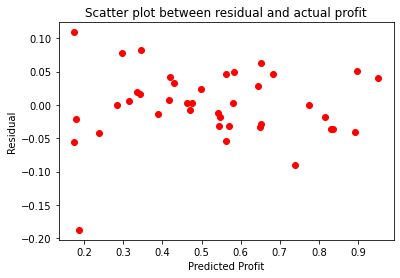

In [46]:
plt.scatter(y_train_pred, residuals_train,c='red')
plt.title('Scatter plot between residual and actual profit')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual')
plt.show()

# Let's check for multicollinearity:

In [47]:
dataset[independent_variables].corr()

,Florida_State,NewYork_State,Marketing Spend,California_State,Administration,R&D Spend
Florida_State,1.000000,-0.492366,0.205685,-0.492366,0.010493,0.105711
NewYork_State,-0.492366,1.000000,-0.033670,-0.515152,0.005145,0.039068
Marketing Spend,0.205685,-0.033670,1.000000,-0.168875,-0.032154,0.724248
California_State,-0.492366,-0.515152,-0.168875,1.000000,-0.015478,-0.143165
Administration,0.010493,0.005145,-0.032154,-0.015478,1.000000,0.241955
R&D Spend,0.105711,0.039068,0.724248,-0.143165,0.241955,1.000000


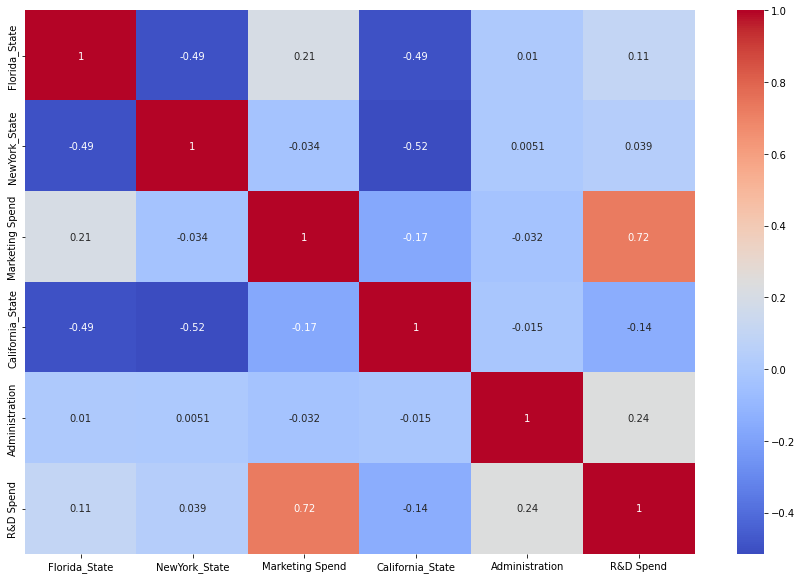

In [48]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset[independent_variables].corr(),  annot=True, cmap="coolwarm")

1.Correlation between marketing spend and R&D spend is very high, hence it needs attention.

2.Florida_state and california is negatively correlated very high,same as Newyork_state and florida.hence it also needs attention


# Evaluation metrics

In [49]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))

In [50]:
# Training dataset metrics
print_metrics(y_train, y_train_pred)

MSE is 0.002636465843791829
RMSE is 0.05134652708598537
RMSE is 0.9453244059303094
MAE is 0.037780557286873205


In [51]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 0.0021265237102873072
RMSE is 0.04611424628341341
RMSE is 0.9551244652574087
MAE is 0.03223802261301399


Training set errors and test set errors are almost same, so no underfitting or overfitting detected